# Обработка пропусков

In [ ]:
import pandas as pd
import numpy as np

Создадим и выведем небольшой набор тестовых данных.

In [ ]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4], 
                          [0, 1, 2]], columns=['one', 'two', 'three'])

In [ ]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


## Поиск пропусков

В данных часто бывают пропуски. В Pandas их можно находить с помощью метода `.isna()`:

In [ ]:
test_data.isna()

,one,two,three
0,False,False,True
1,False,True,False
2,False,False,False


Можно находить пропуски в пределах одного признака (столбца):

In [ ]:
test_data['two'].isna()

0    False
1     True
2    False
Name: two, dtype: bool

## Удаление столбцов/строк с пропусками

С помощью метода `.dropna()` можно удалять столбцы/строки с пропусками, указывая ось с помощью параметра `axis`.  
Если нужно удалить строки, в которых встречается пропуск (NaN), `axis=0`:

In [ ]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


In [ ]:
test_data.dropna(axis=0)

,one,two,three
2,0,1.0,2.0


Если нужно удалить столбцы, в которых встречается пропуск (NaN), `axis=1`:

In [ ]:
test_data.dropna(axis=1)

,one
0,1
1,3
2,0


По умолчанию, параметр `axis` равен 0:

In [ ]:
test_data.dropna()

,one,two,three
2,0,1.0,2.0


Если нужно удалить пропуски только для определенных столбцов (или строк, при указании другого значения параметра `axis`), нужно передать список индексов (номеров строк или названий столбцов) столбцов (или строк) в параметр `subset`:

In [ ]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


In [ ]:
test_data.dropna(subset=[0], axis=1)

,one,two
0,1,2.0
1,3,NaN
2,0,1.0


In [ ]:
test_data.dropna(subset=['two'], axis=0)

,one,two,three
0,1,2.0,NaN
2,0,1.0,2.0


## Заполнение статистиками

Иногда удаление строк/столбцов с пропусками - слишком грубое решение. Можно заменять пропуски статистиками или каким-то константным значением с помощью метода `fillna()`:

In [ ]:
# По умолчанию заменяет все пропуски
test_data.fillna(-1)

,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


Можно заменять разными статистиками, например:
 - среднее значение, `np.mean()`
 - максимальное значение, `np.max()`
 - минимальное значение, `np.min()`
 - медиана, `np.median()`


In [ ]:
max_two = np.max(test_data['two'])
test_data['two'].fillna(max_two)

0    2.0
1    2.0
2    1.0
Name: two, dtype: float64

Методы типа `np.mean()` можно вызывать у самих столбцов с помощью `column.mean()`:

In [ ]:
test_data['three'].fillna(test_data['three'].mean())

0    3.0
1    4.0
2    2.0
Name: three, dtype: float64

In [2]:
# Задание 6.6

# Загрузите данные train.csv, найдите признак, обозначающий штат. Затем найдите значение, 
# которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся 
# признак в переменную result.
import pandas as pd

vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data.head(3)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,IL,60606,NaN,USA,2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,MI,48208,NaN,USA,2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,MI,48223,NaN,USA,2004-04-26 13:40:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [19]:
mx_val = vis_data['state'].value_counts().index[0]
result = vis_data['state'].fillna(mx_val)

(result == vis_data['state']).all()

True

In [51]:
# Задание 6.7

# Data set, посвященный квартирам, выставленным на продажу. 
# Избавимся от пропусков. Нас будут интересовать только те квартиры, про которые продавцы 
# заполнили все данные. Удалите все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

import pandas as pd

data = pd.read_csv('data_flats.csv', sep=";")

data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [52]:
data.shape

(30469, 56)

In [53]:
data.dropna(axis=0).shape

(13652, 56)

In [41]:
# data.info()

In [36]:
for col in data:
    print(sum(data[col].isna()), col)

0 id
1 full_sq
5095 life_sq
168 floor
1 sub_area
5111 preschool_quota
1 preschool_education_centers_raion
5109 school_quota
1 school_education_centers_raion
1 school_education_centers_top_20_raion
11612 hospital_beds_raion
1 healthcare_centers_raion
1 university_top_20_raion
1 sport_objects_raion
1 additional_education_raion
1 culture_objects_top_25_raion
1 shopping_centers_raion
1 office_raion
1 metro_min_avto
1 metro_km_avto
14 metro_min_walk
14 metro_km_walk
1 kindergarten_km
1 school_km
1 park_km
1 green_zone_km
1 industrial_km
14 railroad_station_walk_km
14 railroad_station_walk_min
1 public_transport_station_km
1 public_transport_station_min_walk
1 mkad_km
1 ttk_km
1 sadovoe_km
1 bulvar_ring_km
1 kremlin_km
1 big_market_km
1 market_shop_km
1 fitness_km
1 swim_pool_km
1 ice_rink_km
1 stadium_km
1 basketball_km
1 hospice_morgue_km
1 university_km
1 workplaces_km
1 shopping_centers_km
1 office_km
1 additional_education_km
1 preschool_km
1 big_church_km
1 church_synagogue_km
1 theate

In [ ]:
# вы хотите проанализировать состояние цен на квартиры в нескольких  районах: 
# "Лефортово", "Перово", "Басманное" и "Богородское". Для того, чтобы сравнить цены на 
# квартирах в этих районах, можно использовать визуализацию с помощью боксплотов. 
# Постройте боксплоты для распределения цен по этим районами (должно получиться четыре боксплота 
# - по одному для каждого района). На основании полученных диаграмм ответьте на вопросы ниже.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Flat Price')

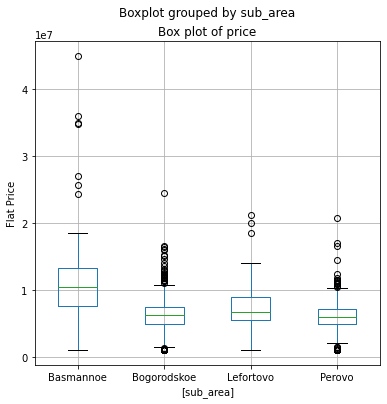

In [64]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(6, 6))
ax = fig.gca() # Define axis 
condition = (
    (data['sub_area'] == 'Lefortovo') |
    (data['sub_area'] == 'Perovo') |
    (data['sub_area'] == 'Basmannoe') |
    (data['sub_area'] == 'Bogorodskoe')
    )
data[condition].loc[:,['price_doc', 'sub_area']].boxplot(by='sub_area', ax=ax)
ax.set_title('Box plot of price')
ax.set_ylabel('Flat Price')

In [65]:
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [67]:
data['ecology'].unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

In [68]:
ecology_dict = {'no data': 0, 'poor': 1,  'satisfactory': 2, 'good': 3, 'excellent': 4}
data['ecology'] = data['ecology'].replace(to_replace=ecology_dict)

In [70]:
data_dum = pd.get_dummies(data,
                           columns=["sub_area"],
                           prefix="area_"
                           )
print(data.shape)
print(data_dum.shape)

(30469, 56)
(30469, 201)


In [74]:
round(data_dum['ecology'].mean(), 2)

1.73

# Нормализация данных и удаление данных

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 417], 
                          [0, 10, -212]], columns=['one', 'two', 'three'])

In [ ]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,417.0
2,0,10.0,-212.0


## Нормализация: теория

Некоторые алгоритмы обращают внимание на масштаб переменных - это помогает алгоритму (например, градиентному спуску) лучше сходиться. Для этого нужно делать нормализацию данных - приведение переменных к одному масштабу.  
Кроме этого, если есть несколько наборов данных одной природы, но разного размера, их нужно нормализовать, чтобы иметь возможность сравнить влияние каких-то других признаков.  
Несмотря на то, что некоторые алгоритмы работают независимо от масштаба признаков, хуже от нормализации обычно не становится.  
Когда мы говорим о нормализации, мы говорим о числах.   
Мы посмотрим на работу методов нормализации из библиотеки `sklearn`. На вход будем подавать `pandas.DataFrame`, на выходе будем получать `np.ndarray`. Информация о структуре `pandas`-таблицы теряется.

## minmax нормализация

Одним из стандартных способов нормализации является `minmax` нормализация.  
Данный вид нормализации приводит независимо каждый признак к значению между 0 и 1.  
Как это работает? Для каждого признака алгоритм находит минимальное ($x_{min}$) и максимальное ($x_{max}$) значение, после этого признак `x` трансформируется в $$x := \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [ ]:
test_data = test_data.fillna(0)

In [ ]:
test_data

,one,two,three
0,1,2.0,0.0
1,3,0.0,417.0
2,0,10.0,-212.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 0.2       , 0.33704293],
       [1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ]])

## std нормализация (стандартная нормализация)

`std` нормализация (иначе называется `стандартная нормализация` или `zero mean, unit variance`) - еще один вид нормализации признаков.  
Как он работает? Для каждого признака алгоритм независимо находит среднее значение ($x_{mean}$) и стандартное отклонение ($x_{std}$), после этого признак `x` трансформируется в $$x := \frac{x - x_{mean}}{x_{std}}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124, -0.46291005, -0.26151831],
       [ 1.33630621, -0.9258201 ,  1.33438124],
       [-1.06904497,  1.38873015, -1.07286293]])

`MinMaxScaler` и `StandardScaler` сохраняют параметры, с которыми проводит нормализацию. Это значит, что после нормализации признаков в тренировочной выборке нужно будет применить ту же нормализацию с валидационными и тестовыми данными. Про валидацию мы поговорим позже.

## Удаление ненужных строк и столбцов

Иногда в данных находятся признаки (столбцы), которые не несут никакой полезной информации или были считаны по ошибке.  
Их можно можно удалить с помощью метода `.drop(column_names, axis=1)`. В `columns` необходимо передать или название признака (столбца), или список названий признаков (столбцов):

In [ ]:
test_data

,one,two,three
0,1,2.0,0.0
1,3,0.0,417.0
2,0,10.0,-212.0


In [ ]:
test_data.drop('one', axis=1)

,two,three
0,2.0,0.0
1,0.0,417.0
2,10.0,-212.0


In [ ]:
test_data.drop(['one', 'three'], axis=1)

,two
0,2.0
1,0.0
2,10.0


Если в предыдущем методе в параметр `axis` передавать `0`, метод будет удалять строки с номерами, которые вы передадите (или один номер, или список номеров):

In [ ]:
test_data.drop(0, axis=0)

,one,two,three
1,3,0.0,417.0
2,0,10.0,-212.0


In [ ]:
test_data.drop([0, 2], axis=0)

,one,two,three
1,3,0.0,417.0


In [6]:
# Задание 8.3

# Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак 
# с помощью std-нормализации. Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. 
# Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). 
# В качестве ответа укажите минимальное значение в получившемся нормализованном признаке. 
# Ответ округлите до 5 знаков после запятой.

import pandas as pd

data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [7]:
data.shape

(250306, 34)

In [12]:
import numpy as np

balance = np.array(data['balance_due'])

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
balance_std = scaler.fit_transform(balance.reshape(-1, 1))

In [16]:
round(balance_std.min(), 5)

-13.14733

In [22]:
# Задание 10.2

# Загрузите данные train.csv , найдите признак, обозначающий баланс. Для приведения данных к 
# более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
# Возьмите корень у положительных значений, найдите медианное и среднее значение. 
# В качестве ответа укажите модуль разницы этих значений. Ответ округлите до 6 знаков после запятой.

med = np.median(np.sqrt(balance[balance > 0]))
ave = np.mean(np.sqrt(balance[balance > 0]))

print(round(abs(ave- med), 6))

0.452596


In [25]:
# Задание 12.6

# train.csv , найдите признак, обозначающий баланс и признак, обозначающий размер скидки. 
# Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. 
# В качестве ответа укажите номер признака, который содержит максимальное среднее значение.
# 'balance_due', 'discount_amount'
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(data[['balance_due', 'discount_amount']])
poly_features.mean(axis=0)

array([ 1.00000000e+00,  2.22449058e+02,  1.25166796e-01,  4.17195810e+05,
       -9.85531709e+00,  1.17817392e+01,  2.04200098e+09,  1.17924384e+05,
       -1.49564074e+02,  3.07417605e+03])

In [31]:
poly_features.shape

(250306, 10)

In [32]:
poly_features.mean(axis=0).argmax()

6

In [35]:
# Задание 12.7

# данные train.csv, найдите признак, обозначающий дату, когда был выписан штраф. 
# Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа.
# Выходными считаются дни под номерами 5 и 6.
# 'ticket_issued_date'
data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [37]:
ticket_issued_date = pd.to_datetime(data['ticket_issued_date'])

ticket_issued_date.head(2)

0   2004-03-16 11:40:00
1   2004-04-23 12:30:00
Name: ticket_issued_date, dtype: datetime64[ns]

In [38]:
ticket_issued_date[ticket_issued_date.dt.weekday > 4].shape

(1620,)

# Визуализация для предобработки

## Гистограмма

Гистограмма показывает распределение данных. С помощью нее можно увидеть, как распределены данные, есть ли выбросы.  
Загрузим данные:

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
vis_data = pd.read_csv("./data/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


Один из начальных этапов работы с данных - визуализация и поиск проблем, которые можно решить. О визуализации в целом мы поговорим позже, здесь мы обсудим применение в контексте предобработки.  
Многие алгоритмы работают лучше, когда на вход принимают данные, распределенные нормально.  
Посмотрим на гистограмму какого-нибудь из признаков. Для удобства оставим только значения больше 0.  
**Совет** - на деле удаление из рассмотрения значений меньше 0 является не удобством, а необходимостью. Например, если признак обозначает выплату зарплаты, он не может быть меньше 0; тогда любые значения меньше 0 являются выбросами, мы поговорим о них чуть позже. 

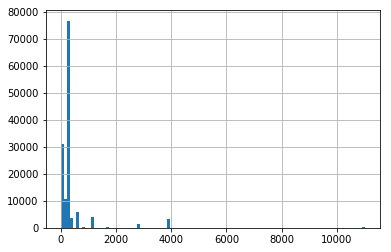

In [ ]:
vis_data.balance_due[vis_data.balance_due > 0].hist(bins=100);

Одним из способов сделать данные более "нормальными" является взятие логарифма.  
При этом, не должно быть значений, равных 0, иначе метод `np.log` выдаст $-\infty$.

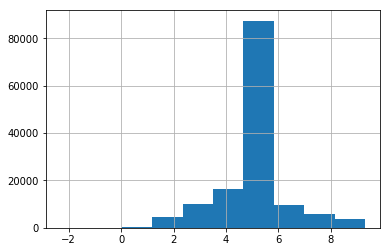

In [ ]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist();

Другим способом является взятие квадратного корня от данных:

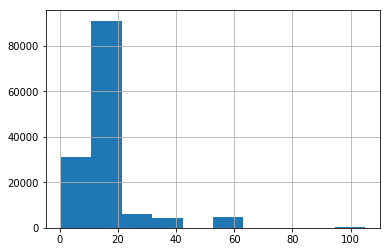

In [ ]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist();

Выше мы явно отсекли значения в данных, равные `0`. Если значения все-таки начинаются с `0`, перед взятием логарифма можно прибавить `1` к данным. Логарифм от `1` превратится в `0`.

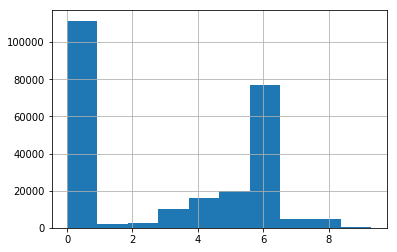

In [ ]:
np.log(vis_data.balance_due[vis_data.balance_due >= 0] + 1).hist();

## Correlation plot

Некоторые признаки сильно скоррелированы друг с другом. Это значит, между этими признаками есть некоторая линейная зависимость. Если зависимость большая - часть скоррелированных признаков (не все) следует убрать из выборки, так как они несут избыточную информацию.  
При этом, отсутствие корреляции не означает отсутствие зависимости - между признаками в таком случае может быть сложная нелинейная зависимость.  
Для определения такой зависимости, можно посчитать матрицу корреляции для признаков и построить, например, heatmap, чтобы проще было увидеть зависимость.  
На главной диагонали этой матрицы будут стоять единицы, потому что для признака считается корреляция с самим собой.

In [ ]:
import seaborn as sns

In [ ]:
corr = vis_data.drop(['violation_zip_code', 'payment_amount', 
                      'clean_up_cost', 
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ticket_id,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1,-0.038,-0.038,-0.0057,-0.02,-0.013,0.0037
admin_fee,-0.038,1,1,0.29,0.027,0.32,0.28
state_fee,-0.038,1,1,0.29,0.027,0.32,0.28
late_fee,-0.0057,0.29,0.29,1,-0.014,0.99,0.95
discount_amount,-0.02,0.027,0.027,-0.014,1,0.041,-0.018
judgment_amount,-0.013,0.32,0.32,0.99,0.041,1,0.94
balance_due,0.0037,0.28,0.28,0.95,-0.018,0.94,1


# Feature engineering

Создание новых признаков - трудоемкий процесс, который позволяет значительно повысить точность модели при правильном использовании методов создания новых признаков. Самое большое повышение точности обычно случается после того, как Data Science разработчик погружается в предметную область задачи, потому что это позволяет создавать новые признаки осмысленно.  
Несмотря на это, есть автоматические/полуавтоматические методы создания новых признаков, о которых мы поговорим ниже.  
Для исследования темы создания новых признаков воспользуемся датасетом `vis_data` и дополним его новой информацией:

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv("./data/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("./data/latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

## Ручное создание признаков

Ручное создание признаков требует погружения в предметную область задачи и не всегда гарантирует положительный результат.  
Часто данные приходят без пояснения и есть только сами табличные данные и, если повезет, названия признаков. Нам повезло. Посмотрим на данные и на названия признаков:

In [ ]:
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,...,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"14512 sussex, Detroit MI",42.394657,-83.194265


In [ ]:
vis_data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'mailing_address_str_number', 'mailing_address_str_name', 'city',
       'state', 'zip_code', 'non_us_str_code', 'country', 'ticket_issued_date',
       'hearing_date', 'violation_code', 'violation_description',
       'disposition', 'fine_amount', 'admin_fee', 'state_fee', 'late_fee',
       'discount_amount', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance', 'address', 'lat',
       'lon'],
      dtype='object')

Судя по названию переменных, это данные о нарушителях, которые должны платить штраф за какое-то правонарушение.  
Есть переменная compliance, которая принимает значения `0`, `1` и `None`. Так как описания нет, мы можем предположить, что 0 - нарушитель заплатил штраф, 1 - не заплатил. Что в данном контексте означает None понять трудно, возможно, это пропуски, которые следует просто выбросить.  
Кроме изначальных признаков нам также дали ширину и долготу. Также, есть признак `city`. Что можно сделать с таким набором признаков? Например, можно посмотреть расстояние от точки правонарушения до центра города, в котором произошло нарушение. Давайте сначала исследуем, какие города представлены в выборке:

In [ ]:
# Можно посмотреть на value_counts, не ограничивая вывод, 
# чтобы увидеть, как много там разных значений
vis_data.city.value_counts()[:10]

DETROIT             136936
SOUTHFIELD           13436
Detroit              10496
detroit               4183
DEARBORN              3637
FARMINGTON HILLS      2329
OAK PARK              2216
WARREN                2000
DET                   1657
W. BLOOMFIELD         1635
Name: city, dtype: int64

Видно, что подавляюще большую часть значений составляет `DETROIT`. Также, чуть ниже видны `Detroit` и `detroit`.  
Название города с самым большим количеством нарушений записано по-разному в данных. Возможно, некоторые другие города тоже записаны в разном регистре.  

In [ ]:
vis_data.city = vis_data.city.apply(lambda x: x.lower())

In [ ]:
vis_data.city.value_counts()[:10]

detroit             151621
southfield           14760
dearborn              4017
farmington hills      2508
oak park              2432
warren                2150
det                   1928
livonia               1798
w. bloomfield         1795
redford               1718
Name: city, dtype: int64

Теперь мы более точно видим, что большинство преступлений (из представленных в выборке) совершается в Детройте.  
Возможно, информативным признаком будет расстояние от места правонарушения до центра Детройта.  
Теперь давайте найдем для каждого нарушения, для которого есть широта и долгота, его расстояние до центра Детройта со следующими координатами:
 - широта: 42.331429
 - долгота: -83.045753

In [ ]:
from math import radians, sin, cos, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371 
    return c * earth_radius

vis_data['distance'] = vis_data.apply(lambda row: 
                                      haversine(lon1 = -83.045753, 
                                                lat1 = 42.331429,
                                                lon2 = row['lon'], 
                                                lat2 = row['lat']), 
                                      axis=1)

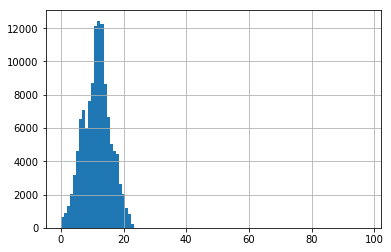

In [ ]:
vis_data['distance'][vis_data['distance'] < 100].hist(bins=100);

## Создание полиномиальных признаков

Теперь рассмотрим более механические и менее интеллектуальные способы создать признаки. Новые признаки можно создавать, просто перемножением и делением старых признаков друг на друга.  
Кроме этого, можно брать один признак и возводить его, например, в квадрат или брать из него корень. То есть, в более общем виде, можно создать новый признак из старого, возведя все значения старого признака в дробную степень.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Класс `PolynomialFeatures` из библиотеки `sklearn` принимает на вход набор признаков и на выходе отдает полиномиальные признаки, сгенерированные на основе входных и со степенью меньше либо равной указанной.  
Например, для признаков `[a, b]` и степени `2` он вернет `[1, a, b, a^2, ab, b^2]`.

In [ ]:
pf = PolynomialFeatures(2)

In [ ]:
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features

array([[1.0000e+00, 3.0500e+02, 0.0000e+00, 9.3025e+04, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.5000e+01, 7.8000e+02, 5.6250e+03, 5.8500e+04,
        6.0840e+05],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
poly_features.shape

(250306, 6)

## Dummy-переменные

Когда мы говорим о категориальных признаках, есть два основных случая:
 - Категориальный признак содержит строки, никакая модель не примет их на вход, потребуется некоторое преобразование
 - Категориальный признак содержит числа. В таком случае, в принципе, можно никак не трогать этот признак, но это будет неправильно с точки зрения логики обучения модели.
 
Рассмотрим второй случай: есть признак "тип животного", который принимает `n` различных значений: значение 0, если животное - кошка, 1 - если тигр, 2 - если пантера. В отличие от `continuous` признаков, то есть, имеющих некоторый порядок, категориальные признаки такого порядка не имеют - мы не можем строго сравнить тигра и пантеру, это просто разные сущности. Некоторые алгоритмы могут работать с категориальными признаками, некоторые - нет.  
Естественной предобработкой для таких признаков является создание dummy-переменных на основе категориального признака, то есть, создание `n` признаков-индикаторов. Каждый из индикаторов равен 1 тогда, когда в изначальном примере выбрано соответствующее значение и 0 иначе. 
 

Преобразуем признак `state` в dummy-переменные и посмотрим его `shape`:

In [ ]:
pd.get_dummies(vis_data.state).shape

(250306, 59)

Теперь преобразуем признак `city` в dummy-переменные. Для этого сначала требуется сделать небольшую предобработку, чтобы сократить количество уникальных значений в этом признаке. Для начала, найдем города, которые описывают большинство (`90%`) примеров:

In [ ]:
cities_with_freqs = list(vis_data.city.value_counts())

In [ ]:
top_cities_count = int(np.percentile(cities_with_freqs, 90))
top_cities_count

14

Теперь оставим только этот топ городов, остальные города назовем `other`:

In [ ]:
all_cities = vis_data.city.value_counts().index
top_cities = list(all_cities)[:top_cities_count]
cities_to_throw_away = list(set(all_cities) - set(top_cities))
vis_data.loc[vis_data['city'].isin(cities_to_throw_away), 
             'city'] = 'other'

Теперь количество уникальных значений в признаке `city` сократилось до:

In [ ]:
len(vis_data.city.value_counts())

15

Можем создать dummy-признаки для этой переменной:

In [ ]:
pd.get_dummies(vis_data.city, drop_first=True).head()

,dearborn,det,detroit,eastpointe,farmington hills,livonia,oak park,other,redford,southfield,troy,w. bloomfield,warren,west bloomfield
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Работа с датой/временем

`Pandas` поддерживает работу с датами.  
[Больше про работу с временем в pandas](https://codeburst.io/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f)  
Выберем признак, содержащий время, уберем пропуски и преобразуем его в специальный формат для работы со временем:

In [ ]:
datetime_vals = pd.to_datetime(vis_data.payment_date.dropna())

In [ ]:
datetime_vals.head()

1    2005-06-02
11   2005-03-17
15   2005-02-11
18   2005-03-18
19   2005-03-18
Name: payment_date, dtype: datetime64[ns]

Теперь к этим значениям можно обращаться для определения дня, месяца или года:

In [ ]:
datetime_vals[1].month

6

Кроме этого, можно вытаскивать такие признаки, как день недели:

In [ ]:
datetime_vals[1].weekday()

3

Отсчет начинается с понедельника и с нуля, поэтому мы понимаем, что это четверг.  
Почему это может быть важным признаком? Например, в текущем наборе данных можно использовать такой признак как будний день/выходной, чтобы определить, когда чаще совершают правонарушения:

In [ ]:
dt_issued_date = pd.to_datetime(vis_data.ticket_issued_date)
vis_data['is_weekend'] = dt_issued_date.dt.weekday > 4
vis_data['wd'] = dt_issued_date.dt.weekday

Здесь мы воспользовались специальным селектором `dt`, который для удобства содержит методы для работы со временем в `pandas`.  

## Статистики по наборам признаков

Одним из интересных способов использовать данные для создания новых признаков является расчет различных статистик по данным.  
Примерами статистик могут быть минимум, максимум, стандартное отклонение и многие другие.  
Этот способ работает, если в данных содержится, помимо прочих признаков, некоторое подобие временных рядов.  
Например, примеры - это продукты, а зависимая переменная - купит ли покупатель этот продукт. Признаками, которые нас интересуют, будут стоимость данного продукта за 2015, 2016 и 2017 годы. В таком случае мы можем взять среднее, медиану, максимум, минимум и что угодно еще по этим трем столбцам и получить множество новых признаков.  
Не факт, что данные признаки будут полезны, это мы увидим на этапе валидации и тестирования. Но часто такие признаки действительно оказываются полезными.

# Поиск выбросов (outliers)

In [6]:
import numpy as np
import pandas as pd
from math import radians, sin, cos, asin, sqrt
%matplotlib inline

vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371 
    return c * earth_radius

vis_data['distance'] = vis_data.apply(lambda row: 
                                      haversine(lon1 = -83.045753, 
                                                lat1 = 42.331429,
                                                lon2 = row['lon'], 
                                                lat2 = row['lat']), 
                                      axis=1)

## Поиск и удаление по порогу

Часто оказывается так, что при погружении в предметную область вы начинаете понимать, какие значения данные признаки могут принимать, а какие - не могут. Например, если нужно заплатить штраф, полезно будет проверить, нет ли в выборке значений штрафов, меньших, чем `0`:

In [ ]:
np.sum(vis_data.fine_amount < 0)

0

Кроме этого, интересно посмотреть максимальное значение штрафа:

In [ ]:
max_fine = np.max(vis_data.fine_amount)
max_fine

10000.0

И сколько раз и как часто такой штраф встречается в данных:

In [ ]:
max_fine_count = np.sum(vis_data.fine_amount == max_fine)
max_fine_count, max_fine_count/vis_data.shape[0]

(357, 0.0014262542647799094)

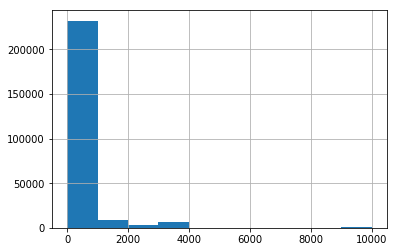

In [ ]:
vis_data.fine_amount.hist();

Очень большое количество данных сосредоточено около 0. Посмотрим, сколько значений штрафов в выборке равно 0:

In [ ]:
vis_data[vis_data.fine_amount == 0].shape[0]

195

Возможно, те значения, где размер штрафа равен 0, являются выбросами, если инспектор забыл добавить размер штрафа или ошибся при вводе.  
В таком случае эти значения следует убрать из выборки. В то же время, сложно однозначно сделать такое решение, не зная всей информации о данных.

Теперь посмотрим на данные поближе:

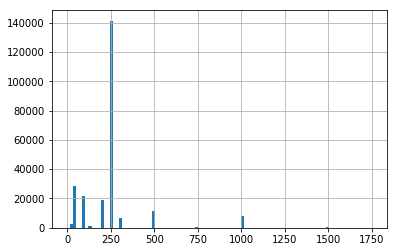

In [ ]:
vis_data.fine_amount[vis_data.fine_amount < 2000].hist(bins=100);

Непохоже, что здесь есть выбросы (кроме нулевых штрафов), но можно категоризировать данные, заменив все значения больше 2000 на переменную `>2000` и сделав все остальные значения категориальными.

## Поиск по отклонению (z-score)
[Источник](http://colingorrie.github.io/outlier-detection.html)

Есть еще один способ поиска выбросов, не требующий настолько же пристального взгляда на данные, что и предыдущий метод.  
Он основан на поиске значения, на которое отклоняется данная точка от среднего. Делается это с помощью z-score, то есть, расстояния (измеряемого в количестве стандартных отклонений) от среднего значения точек.  
Для начала посмотрим на распределение данных для признака `distance`, который мы посчитали ранее:

In [ ]:
import warnings

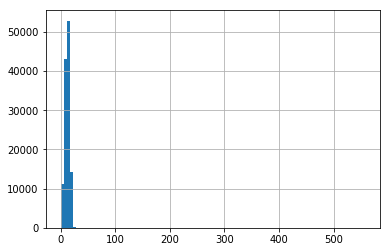

In [ ]:
vis_data.distance.hist(bins=100);

Попытаемся "на глаз" определить порог, после которого мы считаем выбросы. Применим этот порог и посмотрим на количество "выбросов":

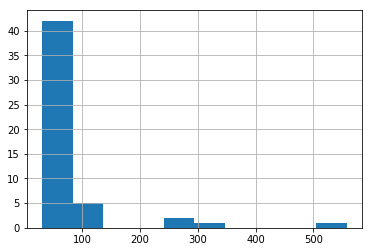

In [ ]:
vis_data.distance[vis_data.distance > 30].hist();

In [ ]:
def outliers_z_score(ys, threshold=3):
    mean_y = np.mean(ys)
    std_y = np.std(ys)
    z_scores = [(y - mean_y) / std_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)[0]

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    o = outliers_z_score(vis_data.distance)

In [ ]:
len(o)

55

Значение по умолчанию для функции поиска выбросов равно `3`. Это означает, что мы считаем выбросами все, что находится на расстоянии больше 3 стандартных отклонений от среднего. Если мы подвигаем этот параметр в большую или меньшую сторону, мы найдем меньше или больше выбросов.

## IQR (interquartile range, межквартильное расстояние)

Один из способов - использовать перцентили (в данном случае квартили) для определения, где находятся выбросы. Для начала, посмотрим на `boxplot` для признака `distance`. Данный вид графика делит данные на 4 части. Та часть данных, которая отделена слева и справа двумя вертикальными линиями (находится внутри коробки) содержит 50% данных, так как левая линия обозначает первый квартиль (25-й перцентиль), а правая линия обозначает третий квартиль (75-й перцентиль).  
Большой вертикальной линией выделена медиана:

In [ ]:
import seaborn as sns

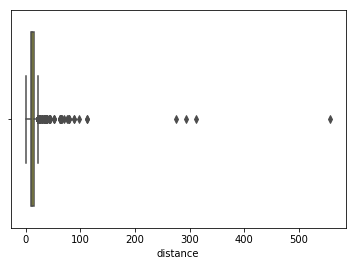

In [ ]:
sns.boxplot(vis_data.distance, color='yellow');

Метод межквартильного расстояния выделяет как выбросы все значения, находящиеся за пределами коробки.  
Посмотрим, сколько выбросов он найдет:

In [11]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

Данный метод чувствителен к пропускам, поэтому избавимся от них:

In [ ]:
o = outliers_iqr(vis_data.distance.dropna())

In [ ]:
len(o)

134

## Поиск по распределению
[Источник](http://aqibsaeed.github.io/2016-07-17-anomaly-detection/)

Еще один способ найти выбросы - построить нормальное распределение поверх данных, посчитать вероятность находиться в данном распределении для каждого значения. Самые невероятные значения будем считать выбросами.

In [ ]:
from scipy.stats import norm

def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def get_gaussian(mu, sigma):
    distribution = norm(mu, sigma)
    return distribution

def get_probs(distribution, dataset):
    return distribution.pdf(dataset)

In [ ]:
mu, sigma = estimate_gaussian(vis_data.distance.dropna())
distribution = get_gaussian(mu, sigma)
probabilities = get_probs(distribution, vis_data.distance.dropna())

Мы построили нормальное распределение на предоставленных данных и посчитали вероятность появления данной точки при данном распределении для каждого значения. Теперь выберем разумное значение вероятности, ниже которой будем считать точку выбросом. Например, `0.014`:

In [ ]:
o_1 = np.where(probabilities < 0.014)[0]

In [ ]:
len(o_1)

58

## DBSCAN

Алгоритм кластеризации DBSCAN определяет группы (кластеры) объектов. Его особенностью является то, что кроме самих кластеров он хорошо находит отдельно стоящие элементы, "шум". Применим его для нахождения выбросов. 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

`DBSCAN` работает очень медленно, поэтому мы возьмем не все данные:

In [ ]:
vis_data.shape

(250306, 36)

In [ ]:
normalized_dist = np.random.choice(vis_data.distance.dropna().values, 
                                   50000).reshape(-1, 1)

In [ ]:
db = DBSCAN(eps=0.5, min_samples=10).fit(normalized_dist)

Проверим количество выбросов:

In [ ]:
len(np.where(db.labels_ == -1)[0])

22

## Проблемы с выбросами

Несмотря на то, что выбросы "портят" общую картину и заставляют статистики в данных (например, среднее) выглядеть неправильно, иногда они очень важны:

 - Если мы занимаемся поиском аномалий (Anomaly Detection), выбросы являются нашими зависимыми переменными, которые необходимо найти, а не значениями, которые нужно выбросить. Поиск аномалий выходит за рамки курса
 - Как можно было понять из методов выше, нет однозначного способа понять, что перед нами выброс. Разные методы возвращают разные точки в качестве выбросов, и эти точки пересекаются лишь частично. Кроме этого, разные параметры дают разные результаты и эти параметры необходимо крутить руками. Из-за этого найденные выбросы является крайне субъективным результатом

In [24]:
# Задание 14.5

# Загрузите данные train.csv , найдите признак, обозначающий баланс. Уберите пропуски из 
# этого признака и найдите выбросы с помощью межквартильного расстояния. 
# Найдите модуль разницы между минимальным и максимальным выбросом.

balance = vis_data['balance_due']
print(balance.shape)
balance = balance.dropna()
print(balance.shape)

(250306,)
(250306,)


In [27]:
outliers_idx = outliers_iqr(balance)
min_outlier = balance[outliers_idx].min()
max_outlier = balance[outliers_idx].max()
print(min_outlier, max_outlier)

-7750.0 11030.0


In [29]:
np.abs(min_outlier - max_outlier)

18780.0